# 1️⃣. Objetivo del desafío

Responder preguntas como: 
* ¿Quiénes son los clientes con mayor riesgo de evasión? 
* ¿Qué variables influyen más en ese comportamiento? 
* ¿Y qué perfil de cliente debemos cuidar con mayor atención? 

Este conocimiento es clave para implementar acciones de retención y estrategias personalizadas.

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico



# 2️⃣. Preparación de los datos

In [1]:
import pandas as pd

In [2]:
df_telecom = pd.read_csv('TelecomX_tratados.csv')
df_telecom.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias
2590,3623-FQBOX,False,Male,False,False,False,21,True,False,No,...,False,False,False,False,Month-to-month,True,Mailed check,19.95,416.40,0.66
3314,4628-CTTLA,True,Male,False,False,False,57,False,False,DSL,...,False,False,True,False,Month-to-month,True,Electronic check,39.30,2111.45,1.31
6965,9610-WCESF,False,Male,False,False,False,67,False,False,DSL,...,False,True,True,False,Two year,False,Electronic check,43.90,3097.20,1.46
113,0193-ESZXP,True,Female,True,True,False,58,True,False,Fiber optic,...,False,True,True,True,One year,True,Credit card (automatic),105.50,6205.50,3.52
6292,8670-ERCJH,False,Male,False,False,False,72,True,True,Fiber optic,...,True,True,True,True,Two year,False,Bank transfer (automatic),113.40,8164.10,3.78


## .1. Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [3]:
df_telecom.drop(['customerID', 'Cuentas_diarias'], axis=1, inplace=True)
df_telecom.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
877,True,Female,False,False,True,5,True,False,DSL,No,False,False,False,False,False,Month-to-month,False,Mailed check,46.00,221.70
1905,False,Female,False,False,False,12,True,True,Fiber optic,No,False,False,True,False,False,Month-to-month,True,Credit card (automatic),79.55,958.25
194,False,Female,False,False,True,11,False,False,DSL,Yes,False,False,True,False,False,One year,True,Mailed check,36.05,402.60
2142,False,Female,False,True,False,25,True,False,Fiber optic,No,False,False,True,True,True,Month-to-month,True,Electronic check,95.15,2395.70
2920,False,Female,False,True,False,52,True,True,Fiber optic,No,True,True,False,True,False,Month-to-month,False,Bank transfer (automatic),94.60,5025.80


## .2. Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [4]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   bool   
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   bool   
 3   Partner           7256 non-null   bool   
 4   Dependents        7256 non-null   bool   
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   bool   
 7   MultipleLines     7256 non-null   bool   
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   bool   
 11  DeviceProtection  7256 non-null   bool   
 12  TechSupport       7256 non-null   bool   
 13  StreamingTV       7256 non-null   bool   
 14  StreamingMovies   7256 non-null   bool   
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   bool   


In [5]:
df_telecom.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Monthly', 'Total'],
      dtype='object')

In [6]:
df_telecom.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,False,Female,False,True,True,9,True,False,DSL,No,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,False,Male,False,False,False,9,True,True,DSL,No,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,True,Male,False,False,False,4,True,False,Fiber optic,No,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,True,Male,True,True,False,13,True,False,Fiber optic,No,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,True,Female,True,True,False,3,True,False,Fiber optic,No,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
categoricas = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# 1. Crea una instancia del codificador
encoder = OneHotEncoder(dtype=int, sparse_output=False)

# 2. Ajusta (fit) y transforma (transform) las columnas categóricas
datos_codificados = encoder.fit_transform(df_telecom[categoricas])

# 3. Obtiene los nombres de las nuevas columnas para crear un nuevo DataFrame
column_names = encoder.get_feature_names_out(categoricas)

# 4. Crear un DataFrame con los datos codificados
df_codificado = pd.DataFrame(datos_codificados, columns=column_names)

# 5. Unir los datos codificados con las columnas no categóricas originales
# Primero, eliminamos las columnas categóricas originales del DataFrame
df_sin_categoricas = df_telecom.drop(columns=categoricas)

# Luego, concatenamos el DataFrame sin las categóricas con el DataFrame codificado
df_codificado = pd.concat([df_sin_categoricas, df_codificado], axis=1)

df_codificado

,tenure,Monthly,Total,Churn_False,Churn_True,gender_Female,gender_Male,SeniorCitizen_False,SeniorCitizen_True,Partner_False,...,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_False,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9,65.60,593.30,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,9,59.90,542.40,1,0,0,1,1,0,1,...,1,1,0,0,1,0,0,0,0,1
2,4,73.90,280.85,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,13,98.00,1237.85,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,3,83.90,267.40,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,13,55.15,742.90,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
7252,22,85.10,1873.70,0,1,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
7253,2,50.30,92.75,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7254,67,67.85,4627.65,1,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,0,1


## .3. Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [9]:
df_codificado['Churn_True'].value_counts(normalize=True)*100

Churn_True
0    71.154906
1    28.845094
Name: proportion, dtype: float64

```Churn_True``` significa abandona $$1 = \text{True}$$ $$0 = \text{False}$$

Por lo tanto si existe un desbalance en los datos

In [10]:
df_codificado.columns

Index(['tenure', 'Monthly', 'Total', 'Churn_False', 'Churn_True',
       'gender_Female', 'gender_Male', 'SeniorCitizen_False',
       'SeniorCitizen_True', 'Partner_False', 'Partner_True',
       'Dependents_False', 'Dependents_True', 'PhoneService_False',
       'PhoneService_True', 'MultipleLines_False', 'MultipleLines_True',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_False', 'OnlineBackup_True', 'DeviceProtection_False',
       'DeviceProtection_True', 'TechSupport_False', 'TechSupport_True',
       'StreamingTV_False', 'StreamingTV_True', 'StreamingMovies_False',
       'StreamingMovies_True', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_False', 'PaperlessBilling_True',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'Payme

## .4. Eliminación columnas repetidas

In [11]:
# Variables a eliminar:
cols_a_eliminar = ['Churn_False', 
                   'gender_Male',
                   'SeniorCitizen_False',
                   'Partner_False',
                   'Dependents_False',
                   'PhoneService_False',
                   'MultipleLines_False',
                   'OnlineBackup_False',
                   'DeviceProtection_False',
                   'TechSupport_False',
                   'StreamingTV_False',
                   'StreamingMovies_False',
                   'PaperlessBilling_False'
                  ]

df_codificado.drop(columns=cols_a_eliminar, inplace=True)
df_codificado

,tenure,Monthly,Total,Churn_True,gender_Female,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,...,StreamingTV_True,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9,65.60,593.30,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,9,59.90,542.40,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,1
2,4,73.90,280.85,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,13,98.00,1237.85,1,0,1,1,0,1,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.90,267.40,1,1,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,13,55.15,742.90,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7252,22,85.10,1873.70,1,0,0,1,0,1,1,...,0,1,1,0,0,1,0,0,1,0
7253,2,50.30,92.75,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
7254,67,67.85,4627.65,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1


## .5. Balanceo de Clases

Aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

### Función para saber que porcentaje va en ```sampling_strategy```

"""
    Aplica SMOTE para balancear un DataFrame al porcentaje deseado de clase minoritaria.
    
    Parámetro:
    -----------
    PorcentMinori : float
        Porcentaje deseado de la clase minoritaria (ej. 0.4 para 40%).
        
    Retorna:
    --------
    sampling_ratio
    porcentaje adecuado para el balanceo según el porcentaje minoritario deseado
    """

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
def porcent_samplig(PorcentMinori):
    # Verifica que el porcentaje sea válido
    if not (0 < PorcentMinori < 0.5):
        raise ValueError("PorcentMinori debe estar entre 0 y 0.5 (ej. 0.4 para 40%).")
    
    # Calcula el ratio minoritaria/mayoritaria
    sampling_ratio = PorcentMinori / (1 - PorcentMinori)
    
    return sampling_ratio

In [14]:
porcent_samplig(0.4)

0.6666666666666667

### Balanceo

In [15]:
# columna objetivo es 'Churn_True'
X = df_codificado.drop(columns=['Churn_True'])
y = df_codificado['Churn_True']

# Crea el oversampler con proporción 60-40
# 0.4 significa que el número de minoritarios será el 40% del total final
smote = SMOTE(sampling_strategy=porcent_samplig(0.4), random_state=42)

X_res, y_res = smote.fit_resample(X, y)

# Une en un DataFrame de nuevo
df_balanceado = pd.concat([pd.DataFrame(X_res, columns=X.columns),
                           pd.Series(y_res, name='Churn_True')], axis=1)

# Verifica nuevo balance
df_balanceado['Churn_True'].value_counts(normalize=True)

Churn_True
0    0.6
1    0.4
Name: proportion, dtype: float64

In [16]:
# Obtiene tamaños
original_counts = df_codificado['Churn_True'].value_counts()
balance_counts = df_balanceado['Churn_True'].value_counts()

# Cuántos casos sintéticos se crearon para la minoritaria
synthetic_created = balance_counts[1] - original_counts[1]
print(f"Casos sintéticos creados para la clase 1: {synthetic_created}")


Casos sintéticos creados para la clase 1: 1349


## .6. Normalización o Estandarización

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

### Calcular sesgo de las columnas numéricas

Esto para saber si los datos son simétricos o no

In [17]:
import numpy as np

In [18]:
columnas_numericas = ['tenure', 'Monthly', 'Total']
# Calcular el sesgo de todas las columnas numéricas
skewness = df_balanceado[columnas_numericas].skew()

print("Sesgo de cada columna:")
print(skewness)

# Interpretar los resultados
print("\nInterpretación:")
for column, skew_value in skewness.items():
    if skew_value > 0.5:
        print(f"La columna '{column}' está sesgada a la derecha (positivo), valor: {skew_value:.2f}")
    elif skew_value < -0.5:
        print(f"La columna '{column}' está sesgada a la izquierda (negativo), valor: {skew_value:.2f}")
    else:
        print(f"La columna '{column}' es aproximadamente simétrica, valor: {skew_value:.2f}")

Sesgo de cada columna:
tenure     0.357856
Monthly   -0.297937
Total      1.035659
dtype: float64

Interpretación:
La columna 'tenure' es aproximadamente simétrica, valor: 0.36
La columna 'Monthly' es aproximadamente simétrica, valor: -0.30
La columna 'Total' está sesgada a la derecha (positivo), valor: 1.04


En este caso como (al menos 1 está sesgado) el ```Total``` está sesgada a la derecha entonces indica que el dataframe está sesgado a la derecha. Por lo que, para poder aplicar un modelo KNN será necesario normalizar los datos de la columna sesgada.

### Normalizar con raíz cuadrada

Solo se normaliza la columna sesgada.

In [19]:
df_normalizado = df_balanceado.copy()
# Aplicar la transformación logarítmica a la columna 'Total'
df_normalizado['Total'] = pd.to_numeric(df_normalizado['Total'], errors='coerce')

df_normalizado['Total_sqrt'] = np.sqrt(df_normalizado['Total'])
df_normalizado.drop(['Total'], axis=1, inplace=True)

# Opcional: Volver a calcular el sesgo para verificar la mejora
sesgo_despues = df_normalizado['Total_sqrt'].skew()
print(f"El sesgo de 'Total_sqrt' después de la transformación es: {sesgo_despues:.2f}")

El sesgo de 'Total_sqrt' después de la transformación es: 0.37


## Estandarizar variables al rango [0,1]

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
columnas_numericas = ['tenure', 'Monthly', 'Total_sqrt']
def estandarizar(df, columnas_numericas):
    scaler = MinMaxScaler()
    df_normalizado1 = pd.DataFrame(
        scaler.fit_transform(df[columnas_numericas]),
        columns=columnas_numericas
    )

    # Conserva el resto de columnas (categóricas, objetivo, etc.)
    df_normalizado2 = pd.concat([df_normalizado1, df.drop(columns=columnas_numericas)], axis=1)
    return df_normalizado2

df_normalizado = estandarizar(df_normalizado, columnas_numericas)
df_normalizado

,tenure,Monthly,Total_sqrt,gender_Female,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,InternetService_DSL,...,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_True
0,0.112676,0.471144,0.225328,1,0,1,1,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,0.112676,0.414428,0.213306,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,1,0
2,0.042254,0.553731,0.139806,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,0.169014,0.793532,0.347158,0,1,1,0,1,0,0,...,1,1,0,0,1,0,0,1,0,1
4,0.028169,0.653234,0.135235,1,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,0.704225,0.754418,0.736846,0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
8601,0.000000,0.706518,0.057526,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
8602,0.000000,0.516991,0.045502,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1
8603,0.000000,0.022496,0.002172,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,1,1


# 3️⃣. Correlación y Selección de Variables

## .1. Análisis dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:
* Tiempo de contrato × Cancelación
* Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

### Tiempo de contrato vs Cancelación

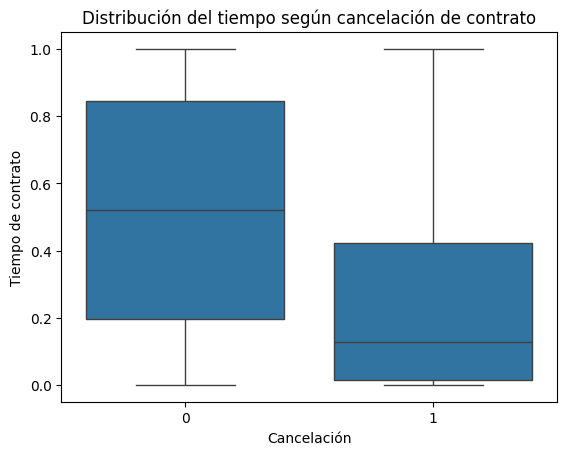

In [23]:
sns.boxplot(data=df_normalizado, x='Churn_True', y='tenure')

plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato')
plt.title('Distribución del tiempo según cancelación de contrato')
plt.show()

En el boxplot anterior, donde se compara el tiempo de contrato (tenure) con la cancelación (Churn_True), se observa que la mediana para los clientes que cancelan es de aproximadamente $10$ meses, mientras que la mediana para los que no cancelan es de alrededor de $37$ meses. \
Esto significa que, para el grupo que cancela, el $50 \%$ de ellos lo hace antes o en los primeros $10$ meses de contrato, mientras que para el grupo que no cancela, el $50 \%$ permanece en la compañía durante $37$ meses o más.

El grupo que no cancela tiene tiempos de contrato claramente más altos y menos dispersos hacia valores bajos, mientras que el grupo que cancela muestra mayor concentración de clientes con contratos cortos, pero con algunos que permanecen bastante tiempo antes de irse (cola superior larga).

### Gasto total vs Cancelación

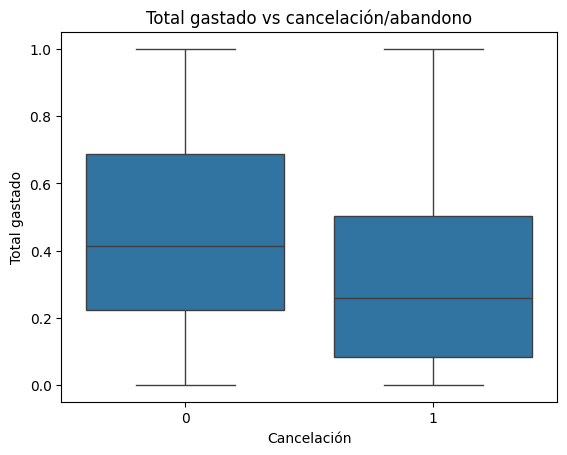

In [24]:
sns.boxplot(data=df_normalizado, x='Churn_True', y='Total_sqrt')

plt.xlabel('Cancelación')
plt.ylabel('Total gastado')
plt.title('Total gastado vs cancelación/abandono')
plt.show()

**Clientes más rentables tienden a quedarse:** \
Los clientes que no cancelan han acumulado más gasto total porque han permanecido más tiempo y/o consumen más productos o servicios.

**Posible relación gasto–fidelidad:** \
La diferencia en las medianas puede sugerir que los clientes con mayor gasto total también tienden a permanecer más, lo que puede indicar fidelidad o satisfacción.

## .2. Análisis de correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [25]:
df_normalizado.corr()

,tenure,Monthly,Total_sqrt,gender_Female,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,InternetService_DSL,...,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_True
tenure,1.000000,0.238315,0.877074,0.014646,0.036352,0.409012,0.192865,0.019415,0.352746,0.011039,...,0.303861,-0.667290,0.235671,0.557551,0.006914,0.257500,0.255611,-0.202942,-0.201397,-0.371776
Monthly,0.238315,1.000000,0.619061,-0.012005,0.200809,0.074798,-0.129575,0.277143,0.478904,-0.209159,...,0.604323,0.056523,-0.003768,-0.087428,0.346936,0.013550,0.011520,0.267144,-0.390947,0.198397
Total_sqrt,0.877074,0.619061,1.000000,0.005425,0.112461,0.355319,0.097588,0.109046,0.483733,-0.041927,...,0.509999,-0.491567,0.218888,0.349554,0.150109,0.204484,0.207310,-0.066625,-0.302297,-0.234859
gender_Female,0.014646,-0.012005,0.005425,1.000000,0.014259,0.036750,0.021290,0.005447,0.013306,0.012919,...,0.012432,-0.020392,0.020178,0.035181,0.004216,0.044962,0.031035,-0.015291,0.012680,-0.081394
SeniorCitizen_True,0.036352,0.200809,0.112461,0.014259,1.000000,0.045837,-0.180593,0.021084,0.146623,-0.098837,...,0.116612,0.112208,-0.029866,-0.090401,0.151642,-0.000728,-0.006725,0.161756,-0.137729,0.074391
Partner_True,0.409012,0.074798,0.355319,0.036750,0.045837,1.000000,0.464623,0.020256,0.154805,0.019980,...,0.133328,-0.309586,0.121634,0.274661,-0.005026,0.147275,0.117699,-0.075832,-0.066211,-0.236769
Dependents_True,0.192865,-0.129575,0.097588,0.021290,-0.180593,0.464623,1.000000,-0.000234,-0.010368,0.072873,...,-0.019378,-0.250872,0.102283,0.228986,-0.103882,0.085532,0.095377,-0.146968,0.079000,-0.230842
PhoneService_True,0.019415,0.277143,0.109046,0.005447,0.021084,0.020256,-0.000234,1.000000,0.276449,-0.449100,...,-0.002281,0.007731,0.003508,0.010859,0.032113,0.013676,-0.006319,0.020584,0.003373,-0.007569
MultipleLines_True,0.352746,0.478904,0.483733,0.013306,0.146623,0.154805,-0.010368,0.276449,1.000000,-0.198432,...,0.271749,-0.114465,0.016585,0.115792,0.158318,0.082613,0.067586,0.077467,-0.211895,-0.010531
InternetService_DSL,0.011039,-0.209159,-0.041927,0.012919,-0.098837,0.019980,0.072873,-0.449100,-0.198432,1.000000,...,0.002628,-0.071061,0.062606,0.049579,-0.072636,0.044403,0.071321,-0.110700,0.063933,-0.162271


In [26]:
corr_matrix = df_normalizado.corr()

# Convierte la matriz de correlación en una serie
corr_pairs = corr_matrix.unstack()

# Filtra las parejas con alta correlación (mayor a 0.7 o menor a -0.7)
# y elimina la correlación de la variable consigo misma
high_corr_pairs = corr_pairs[(corr_pairs > 0.7) | (corr_pairs < -0.7)]
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]

# Ordena los resultados y elimina duplicados para una vista más limpia
high_corr_pairs = high_corr_pairs.sort_values(ascending=False).drop_duplicates()

print("Pares con alta correlación (abs > 0.7):")
print(high_corr_pairs)

Pares con alta correlación (abs > 0.7):
tenure   Total_sqrt                     0.877074
Monthly  InternetService_Fiber optic    0.790388
         InternetService_No            -0.746261
dtype: float64


In [27]:
# Obtiene una lista única de las variables que tienen alta correlación entre sí
variables_a_revisar = pd.unique(high_corr_pairs.index.get_level_values(0).union(high_corr_pairs.index.get_level_values(1)))

# Calcula la correlación de esas variables con la variable objetivo
correlacion_con_objetivo = df_normalizado[variables_a_revisar].corrwith(df_normalizado['Churn_True'])

# Imprime los resultados
print("Variables con alta multicolinealidad y su correlación con 'Churn_True':")
print(correlacion_con_objetivo.sort_values(ascending=False))

Variables con alta multicolinealidad y su correlación con 'Churn_True':
InternetService_Fiber optic    0.299883
Monthly                        0.198397
Total_sqrt                    -0.234859
InternetService_No            -0.242508
tenure                        -0.371776
dtype: float64


### Observaciones

#### **```tenure``` y ```Total_sqrt```**
1. Se nota que ```tenure``` y ```Total_sqrt``` tienen una alta correlación $(0.867959)$. Debido a esta alta correlación, existe un alto riesgo de multicolinealidad en el modelo. Para manejarlo, sería mejor eliminar una de las dos variables antes de entrenar el modelo.

2. La correlación de ```tenure``` con ```Churn_True``` es de $-0.371776$, que es más fuerte que la de ```Total_sqrt```, que es de $-0.215410$. Un valor más cercano a -1 (o 1) indica una relación más fuerte. Por lo tanto, ```tenure``` es un predictor más potente para ```Churn_True``` que ```Total_sqrt```.


Como el objetivo del análisis no está relacionado con el total gastado por los clientes entonces es posible eliminar ```Total_sqrt```.

---

#### **```Monthly``` y ```InternetService_Fiber optic```**
1. La correlación entre ambas variables es de $0.790388$, por lo que es alta, igual que en la pareja anterior se debe eliminar una de las dos para evitar colinealidad.

2. La correlación de ```Monthly``` con ```Churn_True``` es de $0.198397$, y la de ```InternetService_Fiber optic``` con ```Churn_True``` es de $0.299883$, es decir que ```InternetService_Fiber optic``` es un predictor más fuerte para ```Churn_True```.

Por lo que en esta pareja la opción a eliminar parece ser ```Monthly```, pero antes de tomar la decisión hay que ver como se relaciona con la otra variable con la que se halló la correlación.


---

#### **```Monthly``` y ```InternetService_No```**
1. Entre ambas variables existe una alta correlación $(-0.746261)$, esto indica que dentro del modelo puede provocar multicolinealidad, por lo que es necesario eliminar una de las dos.

2. Lac correlación de ```Monthly``` con ```Churn_True``` es de $0.198397$, y la de ```InternetService_No``` con ```Churn_True``` es de $-0.242508$, es decir que ```InternetService_No``` es un predictor más fuerte para ```Churn_True```.

Así que en este caso también se recomienda eliminar ```Monthly``` para evitar multicolinealidad en el modelo, además el dato no aporta nada al objetivo del modelo.

### Conclusión

Las características (columnas) a eliminar son:
* Monthly
* Total_sqrt

In [28]:
df_telecom2 = df_normalizado.copy()
df_telecom2.drop(columns=['Monthly', 'Total_sqrt'], inplace=True)
df_telecom2

,tenure,gender_Female,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_True
0,0.112676,1,0,1,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0.112676,0,0,0,0,1,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0.042254,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
3,0.169014,0,1,1,0,1,0,0,1,0,...,1,1,0,0,1,0,0,1,0,1
4,0.028169,1,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,0.704225,0,0,1,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
8601,0.000000,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
8602,0.000000,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
8603,0.000000,1,0,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1


# 4️⃣. Modelado Predictivo

## .1. Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# 'Churn_True' es la variable objetivo
# Separa las variables predictoras (X) de la variable objetivo (y)
X = df_telecom2.drop('Churn_True', axis=1)
y = df_telecom2['Churn_True']

# Divide los datos en conjuntos de entrenamiento y prueba
# El parámetro test_size=0.3 indica que el 30% de los datos será para prueba
# El parámetro random_state=42 asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprime las dimensiones de los nuevos conjuntos
print("Dimensiones del conjunto de entrenamiento de X:", X_train.shape)
print("Dimensiones del conjunto de prueba de X:", X_test.shape)
print("Dimensiones del conjunto de entrenamiento de y:", y_train.shape)
print("Dimensiones del conjunto de prueba de y:", y_test.shape)

Dimensiones del conjunto de entrenamiento de X: (6023, 26)
Dimensiones del conjunto de prueba de X: (2582, 26)
Dimensiones del conjunto de entrenamiento de y: (6023,)
Dimensiones del conjunto de prueba de y: (2582,)


## .2. Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.
* Un modelo puede requerir normalización, como Regresión Logística o KNN.
* El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:
* **Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.
* **Árbol de Decisión / Random Forest:**  Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

### Modelo 1: KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def fit_modelo_KNN(k_value, X_train, y_train):
    modelo_KNN = KNeighborsClassifier(n_neighbors=k_value)
    # Entrenar el modelo con los datos de entrenamiento
    modelo_KNN.fit(X_train, y_train)
    return modelo_KNN


# Instanciar el modelo k-NN. Elegimos k=5
k_value = 5
modelo_KNN = fit_modelo_KNN(k_value, X_train, y_train)

def y_pred_Accuracy(modelo, X_test, y_test):
    # Hacer predicciones sobre los datos de prueba
    y_pred = modelo.predict(X_test)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

accuracy, y_pred = y_pred_Accuracy(modelo_KNN, X_test, y_test)
print(f"La exactitud del modelo k-NN con k={k_value} es: {accuracy:.4f}")

La exactitud del modelo k-NN con k=5 es: 0.7723


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1568
           1       0.70      0.74      0.72      1014

    accuracy                           0.77      2582
   macro avg       0.76      0.77      0.76      2582
weighted avg       0.78      0.77      0.77      2582



#### ¿Qué nos dice el reporte?

* **precision (Precisión):** Responde a la pregunta: "De todas las veces que el modelo predijo una clase, ¿qué porcentaje fue correcto?".
    * **Clase 0:** El 83% de las veces que el modelo predijo que un cliente permanecería, estaba en lo correcto.
    * **Clase 1:** El 70% de las veces que el modelo predijo que un cliente abandonaría, estaba en lo correcto.

* **recall (Exhaustividad):** Responde a la pregunta: "De todas las instancias de una clase real, ¿qué porcentaje de ellas el modelo identificó correctamente?". Es decir, tasa de verdaderos positivos.
    * **Clase 0:** El modelo identificó correctamente al 79% de los clientes que realmente permanecieron.
    * **Clase 1:** El modelo identificó correctamente al 74% de los clientes que realmente abandonaron. Esta es una métrica muy importante, ya que un alto recall significa que el modelo es bueno para detectar a los clientes que están a punto de irse.

* **f1-score:** Es el promedio armónico de la precisión y la exhaustividad. Ofrece un equilibrio entre ambas métricas y es útil, especialmente en problemas con desequilibrio de clases.
    * El f1-score de 0.72 para la clase 1 da una medida combinada de qué tan bien el modelo predice el abandono.

* **accuracy (Exactitud):** Es el porcentaje total de predicciones correctas en todo el conjunto de prueba (77%).

#### Pruebas para hallar los mejores hiperparámetros

In [34]:
from sklearn.metrics import f1_score

# Rango de valores de k a probar
k_values = [5, 10, 15, 20, 25, 30]
f1_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Encontrar el mejor k
best_k = k_values[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f"El mejor k es {best_k} con un F1-score de {best_f1:.4f}")
print(f"El peor k es {k_values[np.argmin(f1_scores)]} con un F1-score de {np.min(f1_scores):.4f}")

El mejor k es 25 con un F1-score de 0.7395
El peor k es 10 con un F1-score de 0.7188


#### Mejor modelo de KNN

In [44]:
k_value = 25
# Hacer predicciones sobre los datos de prueba
modelo_KNN = fit_modelo_KNN(k_value, X_train, y_train)

accuracy, y_pred = y_pred_Accuracy(modelo_KNN, X_test, y_test)
print(f"La exactitud del modelo k-NN con k={k_value} es: {accuracy:.4f}\n")
print(classification_report(y_test, y_pred))

La exactitud del modelo k-NN con k=25 es: 0.7812

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1568
           1       0.69      0.79      0.74      1014

    accuracy                           0.78      2582
   macro avg       0.77      0.78      0.78      2582
weighted avg       0.79      0.78      0.78      2582



### Modelo 2: Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
def fit_modelo_RForest(n_estimadores, X_train, y_train):
    # Instanciar el modelo Random Forest. Usamos 100 árboles de decisión.
    modelo_RForest = RandomForestClassifier(n_estimators=n_estimadores, random_state=42)

    # Entrenar el modelo con los datos de entrenamiento
    modelo_RForest.fit(X_train, y_train)
    return modelo_RForest

n_estimadores = 100
modelo_RForest = fit_modelo_RForest(n_estimadores, X_train, y_train)

# Predicción y evaluación sobre los datos de prueba
accuracy, y_pred = y_pred_Accuracy(modelo_RForest, X_test, y_test)
print(f"La exactitud del modelo Random Forest es: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

La exactitud del modelo Random Forest es: 0.7878
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1568
           1       0.74      0.72      0.73      1014

    accuracy                           0.79      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.79      0.79      0.79      2582



#### Pruebas para hallar los mejores hiperparámetros

In [40]:
from sklearn.model_selection import GridSearchCV

# Definir un diccionario de parámetros a probar
param_grid = {
    'n_estimators': [100, 150, 160],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 15]
}

# Crear una instancia del modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Crear la instancia de GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Entrenar el Grid Search en tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor f1-score:", grid_search.best_score_)

Mejores parámetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Mejor f1-score: 0.7345781732801513


#### Mejor modelo random forest

In [45]:
# Crear el modelo con los parámetros óptimos
modelo_RForest = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)

# Entrenar el modelo final en todo el conjunto de entrenamiento
modelo_RForest.fit(X_train, y_train)

# Predicción y evaluación sobre los datos de prueba
accuracy, y_pred = y_pred_Accuracy(modelo_RForest, X_test, y_test)
print(f"La exactitud del modelo Random Forest es: {accuracy:.4f}\n")

print(classification_report(y_test, y_pred))

La exactitud del modelo Random Forest es: 0.8029

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1568
           1       0.75      0.75      0.75      1014

    accuracy                           0.80      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.80      0.80      0.80      2582



## .3. Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:
* Exactitud (Accuracy)
* Precisión
* Recall
* F1-score
* Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:
* ¿Cuál modelo tuvo el mejor desempeño?
* ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:
    * Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.
    * Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

<img src="Mejor_modelo_KNN.JPG" style="margin-right:30px;">
<img src="Mejor_modelo_RandomForest.JPG">


# Emojis numeros

1️⃣
2️⃣
3️⃣
4️⃣
5️⃣
6️⃣
7️⃣
8️⃣
9️⃣